In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataframe Details

In [7]:
df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')


C:\Users\joeva\AppData\Local\Temp\ipykernel_9756\2180714732.py:1: DtypeWarning: Columns (26,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2012-2022_FIA_WEC_LAP_DATA.csv')


In [8]:
df.shape

(503680, 48)

In [9]:
df.columns

Index(['Unnamed: 0', 'number', 'driver_number', 'lap_number', 'lap_time',
       'lap_improvement', 'crossing_finish_line_in_pit', 's1',
       's1_improvement', 's2', 's2_improvement', 's3', 's3_improvement', 'kph',
       'elapsed', 'hour', 's1_large', 's2_large', 's3_large', 'top_speed',
       'driver_name', 'pit_time', 'class', 'group', 'team', 'manufacturer',
       'season', 'circuit', 'round', 'vehicle', 'flag_at_fl', 'team_no',
       'lap_time_ms', 'lap_time_s', 'engine', 'driver_stint_no',
       'driver_stint', 'team_stint_no', 'team_stint', 'elapsed_ms', 'position',
       'class_position', 'interval_ms', 'interval', 'gap', 'class_interval',
       'class_gap', 'elapsed_s'],
      dtype='object')

In [10]:
# number: The car number that completed the lap
# driver_number: The driver of the car number that completed the lap
# lap_number: The lap number of the race the lap was completed at
# lap_time: The lap time recorded as they crossed the timing beam
# lap_improvement: Haven't looked into this, but my guess would a variable showing if the driver made improvement vs previous lap_times. Likely 0 is no improvement, 1 is green (personal best), 2 is purple (race best), and 3 is a WR? 99% of the laps have 0 improvement, so further research probably needed.
# crossing_finish_line_in_pit: boolean for if they crossed the finish line, B if they did, nan else
# s1, s2, s3 The sector times recorded as they crossed the timing beam (recorded in ss.mss)
# s1/s2/s3_improvement similar to lap_improvement
# s1/s2/s3_large: how they crossed the timing beams similar to lap_time
# kph: the average kph of the lap
# top_speed: the fastest recorded time of the lap
# driver_name: the driver that recorded the lap
# pit_time: the recorded time that was spent in the pitlane (typically followed by "B" in crossing_finish_line_in_pit)
# class: the class of the car that set the lap time
# group: the group of the car that set the lap time, only applicable to LMP1s and LMP2 Pro/Am (2021 season?)
# team: the team of the car that set the lap
# manufacturer: the manufacturer of the car that set the lap
# season: the WEC season the lap was set at
# circuit: the circuit the lap was set at
# round: the round (race number in the championship) the lap was set at
# vehicle: the car the lap was set with
# flag_at_fl: the flag status at the timing beam (only for 2022)
# lap_time_ms: The lap time recorded in milliseconds (seconds*1000)
# lap_time_s: the lap time recorded in seconds
# team_no: A combination of team and the team's number e.g Toyota Gazoo Racing #7
# engine: The engine of the car the lap was set with.
# driver_stint_no: Labeling the driver stint. A stint changes when the driver pits and either a. stays in the car, or b. swaps into the car.
# driver_stint: A combination of driver_name and the driver_stint_no, e.g. Mike CONWAY Stint #1
# team_stint_no: Labeling the team stint. A stint changes when the driver pits.
# team_stint: A combination of team_no and the team_stint_no, e.g. Toyota Gazoo Racing #7 Stint #1
# position: The position of the car at the time of the lap.
# class_position: The position of the car in class at the time of the lap.
# interval_ms: The interval (gap to the car in front for position) in ms
# interval: The interval (gap to the car in front for position) in s
# gap: The total time to the leader (time to 1st position overall) in s
# class_interval: The interval (gap to the car in front for position in class) in s
# class_gap The total time to the leader (time to 1st position in class) in s

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503680 entries, 0 to 503679
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   503680 non-null  int64  
 1   number                       503680 non-null  int64  
 2   driver_number                503680 non-null  int64  
 3   lap_number                   503680 non-null  int64  
 4   lap_time                     503680 non-null  object 
 5   lap_improvement              503680 non-null  int64  
 6   crossing_finish_line_in_pit  28445 non-null   object 
 7   s1                           503569 non-null  float64
 8   s1_improvement               503680 non-null  int64  
 9   s2                           503406 non-null  float64
 10  s2_improvement               503680 non-null  int64  
 11  s3                           503486 non-null  float64
 12  s3_improvement               503680 non-null  int64  
 13 

In [12]:
df.describe()

,Unnamed: 0,number,driver_number,lap_number,lap_improvement,s1,s1_improvement,s2,s2_improvement,s3,...,team_stint_no,elapsed_ms,position,class_position,interval_ms,interval,gap,class_interval,class_gap,elapsed_s
count,503680.00000,503680.000000,503680.000000,503680.000000,503680.000000,503569.000000,503680.000000,503406.000000,503680.000000,503486.000000,...,503680.000000,5.036800e+05,503680.000000,503680.000000,5.036800e+05,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000
mean,251839.50000,53.766256,1.341775,118.358517,0.010076,44.221335,0.018857,63.995318,0.018887,65.954284,...,8.182618,2.251623e+07,18.534333,5.700790,1.589048e+05,158.904821,2179.684949,131.506613,420.611197,22516.229955
std,145400.03613,67.623157,0.940485,83.514817,0.143167,111.896698,0.170342,29.421726,0.170484,48.209154,...,8.055612,2.175151e+07,12.772971,4.364912,5.976172e+05,597.617202,2859.444803,582.349385,985.250399,21751.510146
min,0.00000,0.000000,0.000000,1.000000,0.000000,16.690000,0.000000,25.266000,0.000000,15.220000,...,0.000000,8.438800e+04,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,84.388000
25%,125919.75000,25.000000,1.000000,52.000000,0.000000,33.644000,0.000000,42.750000,0.000000,35.252000,...,3.000000,7.497529e+06,8.000000,2.000000,6.773000e+03,6.773000,338.071750,2.748000,15.846000,7497.528750
50%,251839.50000,47.000000,1.000000,104.000000,0.000000,36.712000,0.000000,52.883500,0.000000,44.798000,...,5.000000,1.514634e+07,17.000000,5.000000,3.163300e+04,31.633000,1182.121000,20.409000,96.684500,15146.341500
75%,377759.25000,77.000000,2.000000,166.000000,0.000000,39.343000,0.000000,85.384000,0.000000,102.728000,...,10.000000,2.769537e+07,26.000000,8.000000,1.165655e+05,116.565500,2634.542250,83.238250,375.221000,27695.366750
max,503679.00000,777.000000,3.000000,395.000000,3.000000,18025.929000,3.000000,3646.889000,3.000000,3653.638000,...,50.000000,8.692520e+07,62.000000,27.000000,2.455741e+07,24557.407000,40495.937000,24557.407000,27002.532000,86925.196000


In [13]:
df.isna().sum()

Unnamed: 0                          0
number                              0
driver_number                       0
lap_number                          0
lap_time                            0
lap_improvement                     0
crossing_finish_line_in_pit    475235
s1                                111
s1_improvement                      0
s2                                274
s2_improvement                      0
s3                                194
s3_improvement                      0
kph                                 0
elapsed                             0
hour                                0
s1_large                          116
s2_large                          281
s3_large                          201
top_speed                        1949
driver_name                         0
pit_time                       475036
class                               0
group                          423118
team                                0
manufacturer                        0
season      

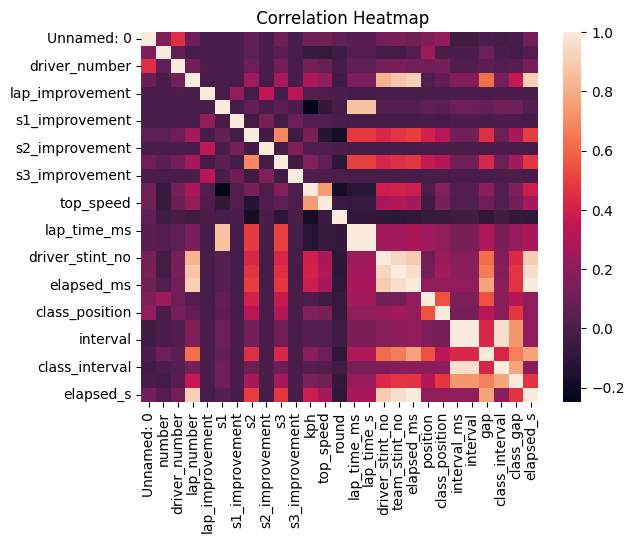

In [14]:
corrilation=df.corr(numeric_only=True)
sns.heatmap(corrilation)
plt.title(' Correlation Heatmap')
plt.show()

## Preprocessing

#### Droping & filling

In [15]:
# removing columns with large number of missing values
df.drop(columns=['crossing_finish_line_in_pit','group','flag_at_fl'],axis=1,inplace=True)


In [16]:
# fill missing values
df['s1']=df['s1'].fillna(df['s1'].mean())
df['s2']=df['s2'].fillna(df['s2'].mean())
df['s3']=df['s3'].fillna(df['s3'].mean())
df['top_speed']=df['top_speed'].fillna(df['top_speed'].median())
df['s1_large']=df['s1_large'].fillna(df['s1_large'].mode()[0])
df['s2_large']=df['s2_large'].fillna(df['s2_large'].mode()[0])
df['s3_large']=df['s3_large'].fillna(df['s3_large'].mode()[0])

df.isna().sum()

Unnamed: 0              0
number                  0
driver_number           0
lap_number              0
lap_time                0
lap_improvement         0
s1                      0
s1_improvement          0
s2                      0
s2_improvement          0
s3                      0
s3_improvement          0
kph                     0
elapsed                 0
hour                    0
s1_large                0
s2_large                0
s3_large                0
top_speed               0
driver_name             0
pit_time           475036
class                   0
team                    0
manufacturer            0
season                  0
circuit                 0
round                   0
vehicle                 0
team_no                 0
lap_time_ms             0
lap_time_s              0
engine                  0
driver_stint_no         0
driver_stint            0
team_stint_no           0
team_stint              0
elapsed_ms              0
position                0
class_positi

In [17]:
df['pit_time'].unique()

array([nan, '0:00:30', '0:23:05', ..., '0:01:27.031', '0:01:06.274',
       '0:01:04.940'], shape=(20358,), dtype=object)

In [18]:
# filling missing values in pit_time as 0 as it affects lap time

df['pit_time']=df['pit_time'].fillna(0)
df['pit_time']

0         0
1         0
2         0
3         0
4         0
         ..
503675    0
503676    0
503677    0
503678    0
503679    0
Name: pit_time, Length: 503680, dtype: object

In [19]:
df['s1_large'].unique()

array(['0 days 00:00:52.533000', '0 days 00:00:52.915000',
       '0 days 00:00:53.568000', ..., '0 days 00:01:41.860000',
       '0 days 00:01:12.238000', '0 days 00:01:12.609000'],
      shape=(68184,), dtype=object)

In [20]:
# removing unwanted and duplicate columns
df.drop(columns=['Unnamed: 0','number','lap_improvement','s1_large','s2_large','s3_large',
                 's1_improvement','s2_improvement','s3_improvement','driver_name','team',
                 'engine','round','vehicle','lap_time','lap_time_ms','interval_ms',
                 'gap','class_gap','class_interval','interval','elapsed','elapsed_s',
                 'elapsed_ms'],axis=1,inplace=True)
df.shape

(503680, 21)

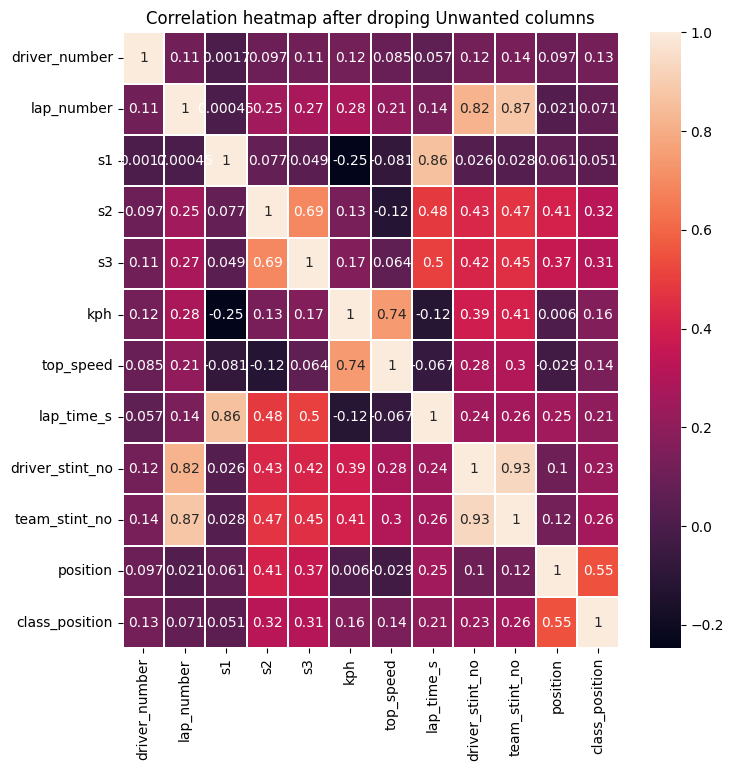

In [21]:
plt.figure(figsize=(8,8))
corrilation=df.corr(numeric_only=True)
sns.heatmap(corrilation,annot=True,linewidths=0.25, linecolor='white')
plt.title('Correlation heatmap after droping Unwanted columns')
plt.show()

#### Dtype conversions

In [22]:
l=df['manufacturer'].unique()
print(len(l))

35


In [23]:
l=df['team_no'].unique()
print(len(l))

322


In [24]:
l=df['team_stint'].unique()
print(len(l))

9536


In [25]:
df['season'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, '2017', '2018-2019',
       '2019-2020', '2021', 2021, 2022], dtype=object)

In [26]:
#converting season from object to int dtype
df['season']=df['season'].astype(str)
df[['season_start','season_end']]=df['season'].str.split('-',expand=True)
df['season_start']=df['season_start'].astype(int)
df['season_start'].value_counts()

season_start
2018    69443
2016    62095
2012    54432
2017    53964
2019    52972
2015    52702
2021    50051
2014    43644
2013    34083
2022    30294
Name: count, dtype: int64

In [27]:
# removing season and season_end
df.drop(columns=['season','season_end'],axis=1,inplace=True)
df.dtypes

driver_number        int64
lap_number           int64
s1                 float64
s2                 float64
s3                 float64
kph                float64
hour                object
top_speed          float64
pit_time            object
class               object
manufacturer        object
circuit             object
team_no             object
lap_time_s         float64
driver_stint_no      int64
driver_stint        object
team_stint_no        int64
team_stint          object
position           float64
class_position     float64
season_start         int64
dtype: object

In [28]:
df['hour']

0                10:33
1                10:33
2                10:33
3                10:33
4                10:33
              ...     
503675    15:57:00.663
503676    15:58:31.854
503677    16:00:34.011
503678    16:02:07.996
503679    16:04:09.218
Name: hour, Length: 503680, dtype: object

In [29]:
# # extracting hour for hour column
# # Convert hour to datetime format then to seconds

def convert_time(time_str):
    
    time_formats=['%M:%S.%f', '%M:%S', '%H:%M:%S.%f', '%H:%M:%S', '%H:%M']
    
    for i in time_formats:
        try:
            time_obj=pd.to_datetime(time_str,format=i,errors='raise')
            # Debugging to check if parsing works
            #print(f"Parsed '{time_str}' with format '{i}'")
            
            #convert to seconds
            sec=(time_obj.hour * 3600) + (time_obj.minute * 60) + time_obj.second + (time_obj.microsecond / 1_000_000)
            return sec
        except ValueError:
            continue
    print(f"Failed to parse '{time_str}'")  # Check which values failed 
    return None

df['hour_s']=df['hour'].apply(convert_time)

df['hour_s']


0           633.000
1           633.000
2           633.000
3           633.000
4           633.000
            ...    
503675    57420.663
503676    57511.854
503677    57634.011
503678    57727.996
503679    57849.218
Name: hour_s, Length: 503680, dtype: float64

In [30]:
df.drop('hour',axis=1,inplace=True)

In [31]:
df['pit_time'].unique()

array([0, '0:00:30', '0:23:05', ..., '0:01:27.031', '0:01:06.274',
       '0:01:04.940'], shape=(20358,), dtype=object)

In [32]:
# converting pit_time to int 

df['pit_time'] = df['pit_time'].str.strip()

print(df['pit_time'].dtype)

df['pit_time'] = df['pit_time'].astype(str)

df['pit_time'] = df['pit_time'].apply(convert_time)

print(df['pit_time'].unique())

print(df['pit_time'].isna().sum())


object
[     nan   30.    1385.    ...   87.031   66.274   64.94 ]
475036


In [33]:
#Filling missing values as 0 in pit time
df['pit_time']=df['pit_time'].fillna(0.0)
print(df['pit_time'].isna().sum())
print(df['pit_time'].unique())

0
[   0.      30.    1385.    ...   87.031   66.274   64.94 ]


#### Encoding

In [34]:
# coverting all strings to lowercase

cols = ['circuit', 'manufacturer', 'driver_stint', 'team_stint', 'team_no']
df[cols] = df[cols].apply(lambda x: x.str.lower())
df

,driver_number,lap_number,s1,s2,s3,kph,top_speed,pit_time,class,manufacturer,...,team_no,lap_time_s,driver_stint_no,driver_stint,team_stint_no,team_stint,position,class_position,season_start,hour_s
0,1,1,52.533,45.335,45.273,151.4,247.6,0.0,LMGTE Am,ferrari,...,krohn racing #57,143.141,1,niclas jönsson stint #1,1,krohn racing #57 stint #1,20.0,1.0,2012,633.000
1,2,1,52.915,45.342,45.759,150.4,220.4,0.0,LMGTE Am,porsche,...,team felbermayr-proton #88,144.016,1,paolo ruberti stint #1,1,team felbermayr-proton #88 stint #1,21.0,2.0,2012,633.000
2,2,1,53.568,45.577,46.133,149.1,233.6,0.0,LMGTE Am,chevrolet,...,larbre competition #50,145.278,1,pedro lamy stint #1,1,larbre competition #50 stint #1,22.0,3.0,2012,633.000
3,2,1,53.938,45.614,45.996,148.8,218.3,0.0,LMGTE Am,chevrolet,...,larbre competition #70,145.548,1,pascal gibon stint #1,1,larbre competition #70 stint #1,23.0,4.0,2012,633.000
4,2,1,54.482,45.816,45.561,148.5,224.0,0.0,LMGTE Am,ferrari,...,af corse-waltrip #61,145.859,1,rui aguas stint #1,1,af corse-waltrip #61 stint #1,24.0,5.0,2012,633.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503675,3,378,33.645,80.892,98.264,230.5,290.0,0.0,HYPERCAR,toyota,...,toyota gazoo racing #7,212.801,13,jose maria lopez stint #13,33,toyota gazoo racing #7 stint #33,2.0,2.0,2022,57420.663
503676,2,379,33.323,80.052,98.935,231.0,334.9,0.0,HYPERCAR,toyota,...,toyota gazoo racing #8,212.310,12,brendon hartley stint #12,32,toyota gazoo racing #8 stint #32,1.0,1.0,2022,57511.854
503677,3,379,34.550,81.034,97.764,229.9,331.8,0.0,HYPERCAR,toyota,...,toyota gazoo racing #7,213.348,13,jose maria lopez stint #13,33,toyota gazoo racing #7 stint #33,2.0,2.0,2022,57634.011
503678,2,380,33.452,80.406,102.284,227.0,331.8,0.0,HYPERCAR,toyota,...,toyota gazoo racing #8,216.142,12,brendon hartley stint #12,32,toyota gazoo racing #8 stint #32,1.0,1.0,2022,57727.996


In [35]:
cols = ['circuit', 'manufacturer']
df[cols] = df[cols].apply(lambda x: x.str.replace(' ','_'))
df[cols]

,circuit,manufacturer
0,sebring,ferrari
1,sebring,porsche
2,sebring,chevrolet
3,sebring,chevrolet
4,sebring,ferrari
...,...,...
503675,le_mans,toyota
503676,le_mans,toyota
503677,le_mans,toyota
503678,le_mans,toyota


##### One-hotencoding

In [36]:
from sklearn.preprocessing import OneHotEncoder
OHE=OneHotEncoder(sparse_output=False, drop='first')

o_h_cols=['circuit','manufacturer']
encoded_df=OHE.fit_transform(df[o_h_cols])
encoded_df = pd.DataFrame(encoded_df, columns=OHE.get_feature_names_out(o_h_cols))


##### TargetEncoding

In [37]:
from category_encoders import TargetEncoder
Tencode=TargetEncoder()

encoded_df['manufacturer']=Tencode.fit_transform(df['manufacturer'],df['lap_time_s'])
encoded_df['team_no']=Tencode.fit_transform(df['team_no'],df['lap_time_s'])

##### Ordinal Encoding

In [38]:
from sklearn.preprocessing import OrdinalEncoder
class_order = ['LMP1-H', 'LMP1-L', 'LMP1', 'HYPERCAR', 'LMP2', 'INNOVATIVE CAR', 'LMGTE Pro', 'LMGTE Am', 'CDNT']
# Values= 0 - 8 in order
OrderEncode=OrdinalEncoder(categories=[class_order])
encoded_df['class']=OrderEncode.fit_transform(df[['class']])

##### Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

encoded_df['team_stint']=label.fit_transform(df['team_stint'])
encoded_df['driver_stint']=label.fit_transform(df['driver_stint'])
encoded_df['team_no']=label.fit_transform(df['team_no'])

In [40]:
encoded_df.describe()

,circuit_autodromo_hermanos_rodriguez,circuit_autodromo_nazionale_di_monza,circuit_bahrain_international_circuit,circuit_bahrain_international_circuit_2019,circuit_bahrain_international_circuit_2020,circuit_bahrain_international_circuit_6_hours,circuit_bahrain_international_circuit_8_hours,circuit_circuit_of_the_americas,circuit_fuji_speedway,circuit_interlagos,...,manufacturer_riley,manufacturer_srt,manufacturer_strakka,manufacturer_toyota,manufacturer_zytek,manufacturer,team_no,class,team_stint,driver_stint
count,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,...,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000,503680.000000
mean,0.023124,0.012998,0.055241,0.014063,0.011335,0.010743,0.013900,0.052357,0.078717,0.029646,...,0.000619,0.000604,0.000310,0.057052,0.011527,174.438258,143.648559,4.764531,4239.529705,3591.499067
std,0.150297,0.113267,0.228451,0.117749,0.105859,0.103090,0.117075,0.222745,0.269296,0.169608,...,0.024881,0.024560,0.017596,0.231942,0.106744,16.889129,97.995360,1.898822,2878.158628,2064.622292
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,124.908537,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,164.761419,44.000000,4.000000,1315.000000,1834.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,176.493569,144.000000,4.000000,4291.000000,3731.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,185.917455,229.000000,7.000000,6694.000000,5303.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,336.805300,314.000000,8.000000,9336.000000,7249.000000


In [41]:
df1=df.drop(columns=['circuit','manufacturer','team_no','class','team_stint','driver_stint'])
print('df1 shape ',df1.shape,"\n\n")
print('encoded_df shape ',encoded_df.shape,"\n\n")
joined_df=pd.concat((df1,encoded_df),axis=1)
joined_df

df1 shape  (503680, 15) 


encoded_df shape  (503680, 56) 




,driver_number,lap_number,s1,s2,s3,kph,top_speed,pit_time,lap_time_s,driver_stint_no,...,manufacturer_riley,manufacturer_srt,manufacturer_strakka,manufacturer_toyota,manufacturer_zytek,manufacturer,team_no,class,team_stint,driver_stint
0,1,1,52.533,45.335,45.273,151.4,247.6,0.0,143.141,1,...,0.0,0.0,0.0,0.0,0.0,185.917455,158,7.0,4711,4777
1,2,1,52.915,45.342,45.759,150.4,220.4,0.0,144.016,1,...,0.0,0.0,0.0,0.0,0.0,171.407830,274,7.0,8091,5175
2,2,1,53.568,45.577,46.133,149.1,233.6,0.0,145.278,1,...,0.0,0.0,0.0,0.0,0.0,208.327825,159,7.0,4741,5374
3,2,1,53.938,45.614,45.996,148.8,218.3,0.0,145.548,1,...,0.0,0.0,0.0,0.0,0.0,208.327825,160,7.0,4779,5187
4,2,1,54.482,45.816,45.561,148.5,224.0,0.0,145.859,1,...,0.0,0.0,0.0,0.0,0.0,185.917455,15,7.0,412,6045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503675,3,378,33.645,80.892,98.264,230.5,290.0,0.0,212.801,13,...,0.0,0.0,0.0,1.0,0.0,145.606279,295,3.0,8680,3028
503676,2,379,33.323,80.052,98.935,231.0,334.9,0.0,212.310,12,...,0.0,0.0,0.0,1.0,0.0,145.606279,296,3.0,8718,847
503677,3,379,34.550,81.034,97.764,229.9,331.8,0.0,213.348,13,...,0.0,0.0,0.0,1.0,0.0,145.606279,295,3.0,8680,3028
503678,2,380,33.452,80.406,102.284,227.0,331.8,0.0,216.142,12,...,0.0,0.0,0.0,1.0,0.0,145.606279,296,3.0,8718,847


## Visualizations

In [42]:
print(joined_df['pit_time'].dtypes)

float64


In [43]:
cols2=['driver_number', 'lap_number', 's1', 's2', 's3', 'kph',
    'top_speed', 'pit_time', 'driver_stint_no','team_stint_no',
    'driver_stint','team_stint', 'position', 'class_position',
    'season_start', 'hour_s','class','lap_time_s'
]
corrilation2=joined_df[cols2].corr(numeric_only=True)
corrilation2

,driver_number,lap_number,s1,s2,s3,kph,top_speed,pit_time,driver_stint_no,team_stint_no,driver_stint,team_stint,position,class_position,season_start,hour_s,class,lap_time_s
driver_number,1.000000,0.112882,0.001668,0.096766,0.111172,0.122696,0.084836,0.003754,0.119043,0.137494,-0.054902,0.054904,0.096540,0.125226,0.441460,0.262992,0.058364,0.056717
lap_number,0.112882,1.000000,0.000449,0.251113,0.273347,0.278285,0.210108,0.016866,0.816776,0.874654,0.005862,0.032561,0.020658,0.071220,0.078235,-0.059075,-0.027996,0.139225
s1,0.001668,0.000449,1.000000,0.076707,0.049355,-0.247452,-0.080940,0.827585,0.025628,0.028247,0.003170,-0.001868,0.061496,0.051093,-0.002288,-0.005930,0.008480,0.862935
s2,0.096766,0.251113,0.076707,1.000000,0.690158,0.134603,-0.124675,0.048176,0.429694,0.471505,0.022687,-0.008984,0.407149,0.320668,0.079930,-0.051692,0.142727,0.484336
s3,0.111172,0.273347,0.049355,0.690158,1.000000,0.166093,0.063570,0.048185,0.421752,0.454573,0.024007,0.008284,0.366041,0.308628,0.111711,-0.032042,0.107602,0.502865
kph,0.122696,0.278285,-0.247452,0.134603,0.166093,1.000000,0.742542,-0.204628,0.386142,0.408168,0.023194,0.114836,0.005981,0.162739,0.118967,-0.015846,-0.228850,-0.116393
top_speed,0.084836,0.210108,-0.080940,-0.124675,0.063570,0.742542,1.000000,-0.025319,0.278787,0.299214,0.019678,0.095407,-0.028945,0.141342,0.124120,0.018951,-0.217247,-0.067372
pit_time,0.003754,0.016866,0.827585,0.048176,0.048185,-0.204628,-0.025319,1.000000,0.035219,0.038045,0.003452,0.003931,0.055067,0.054934,-0.004893,-0.008868,-0.008241,0.743422
driver_stint_no,0.119043,0.816776,0.025628,0.429694,0.421752,0.386142,0.278787,0.035219,1.000000,0.932284,0.027328,0.051835,0.101305,0.232321,0.118761,-0.087923,-0.057245,0.242803
team_stint_no,0.137494,0.874654,0.028247,0.471505,0.454573,0.408168,0.299214,0.038045,0.932284,1.000000,0.026454,0.058537,0.121864,0.260177,0.136059,-0.090873,-0.057723,0.263829


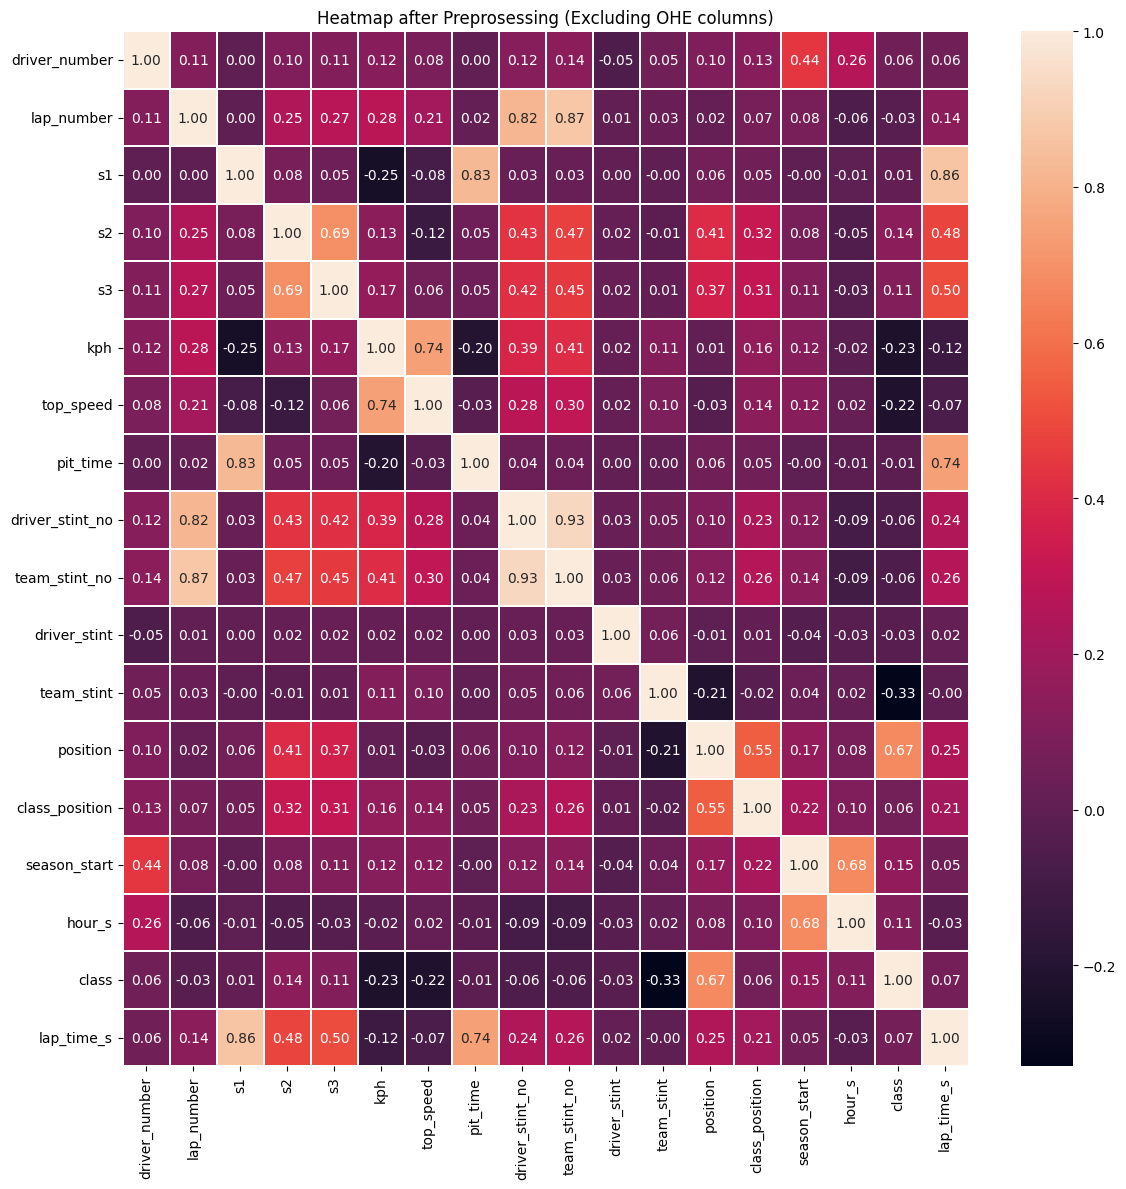

In [44]:
plt.figure(figsize=(12,12))
sns.heatmap(corrilation2,annot=True,linecolor='White',linewidths=0.25, fmt=".2f")
plt.title('Heatmap after Preprosessing (Excluding OHE columns)')
plt.tight_layout()
plt.show()

In [45]:
# dropping features with low corillation values

joined_df.drop(columns=['driver_stint','team_stint','hour_s'],axis=1,inplace=True)

#### Numerical Data

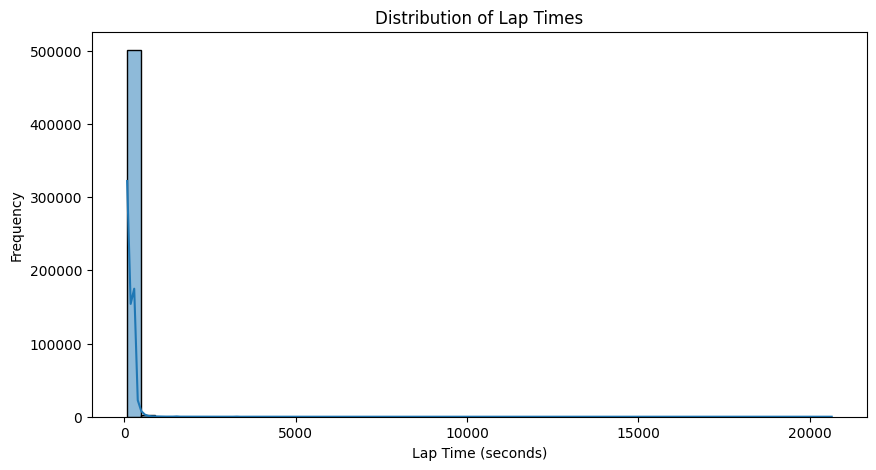

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(df['lap_time_s'], bins=50, kde=True)
plt.xlabel("Lap Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Lap Times")
plt.show()

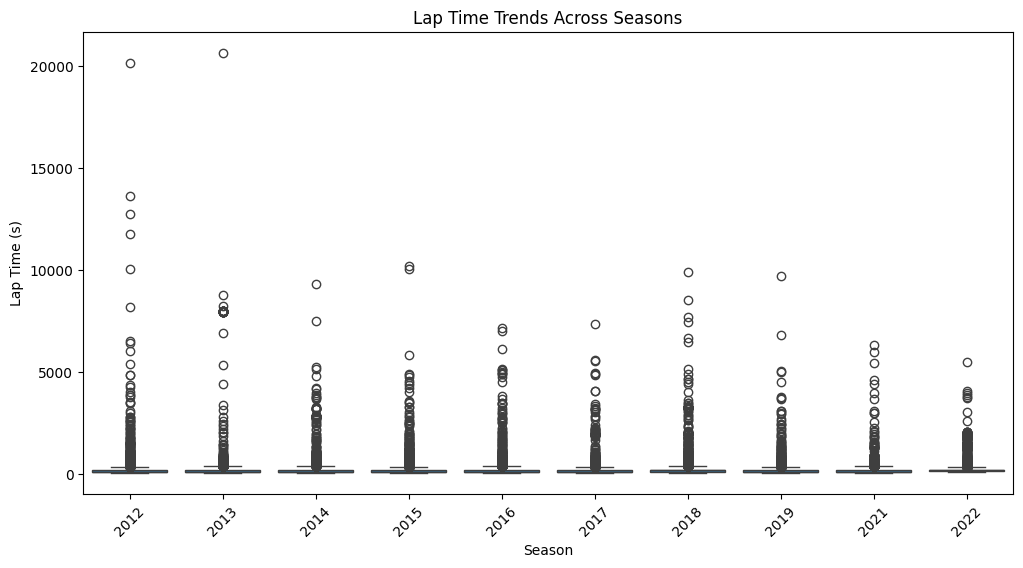

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(x='season_start', y='lap_time_s', data=df)
plt.xlabel("Season")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Trends Across Seasons")
plt.xticks(rotation=45)
plt.show()


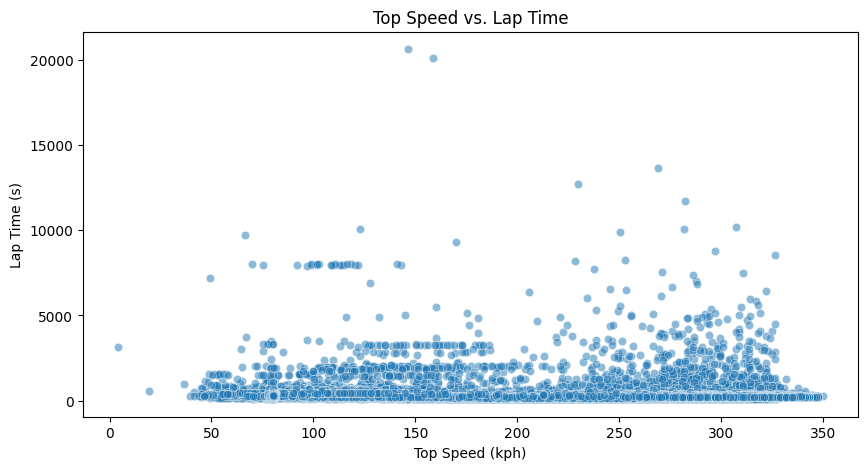

In [48]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='top_speed', y='lap_time_s',data=joined_df, alpha=0.5)
plt.xlabel("Top Speed (kph)")
plt.ylabel("Lap Time (s)")
plt.title("Top Speed vs. Lap Time")
plt.show()


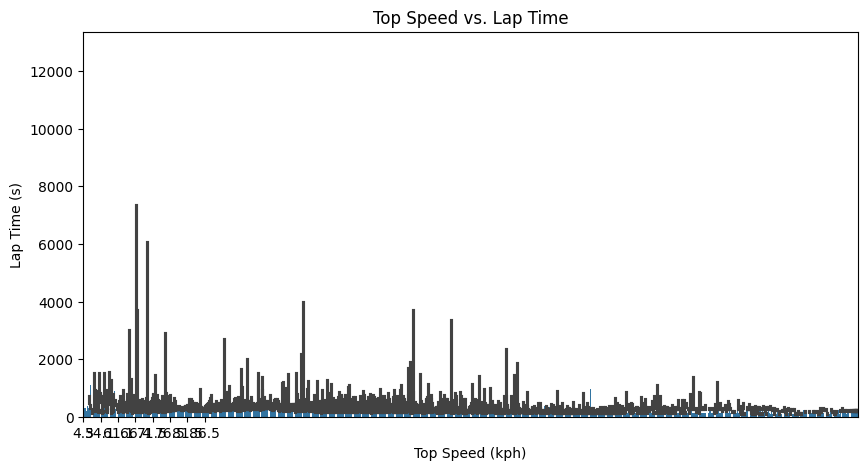

In [49]:
plt.figure(figsize=(10,5))
sns.barplot(x=joined_df['top_speed'],y=joined_df['lap_time_s'])
plt.xticks(range(0,400,50))
plt.xlabel("Top Speed (kph)")
plt.ylabel("Lap Time (s)")
plt.title("Top Speed vs. Lap Time")
plt.show()

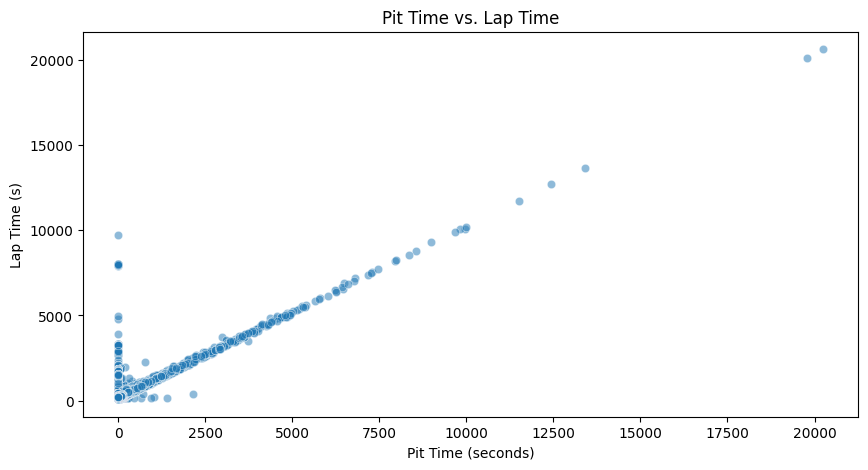

In [50]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='pit_time', y='lap_time_s',data=joined_df, alpha=0.5)
plt.xlabel("Pit Time (seconds)")
plt.ylabel("Lap Time (s)")
plt.title("Pit Time vs. Lap Time")
plt.show()


#### Categorical data

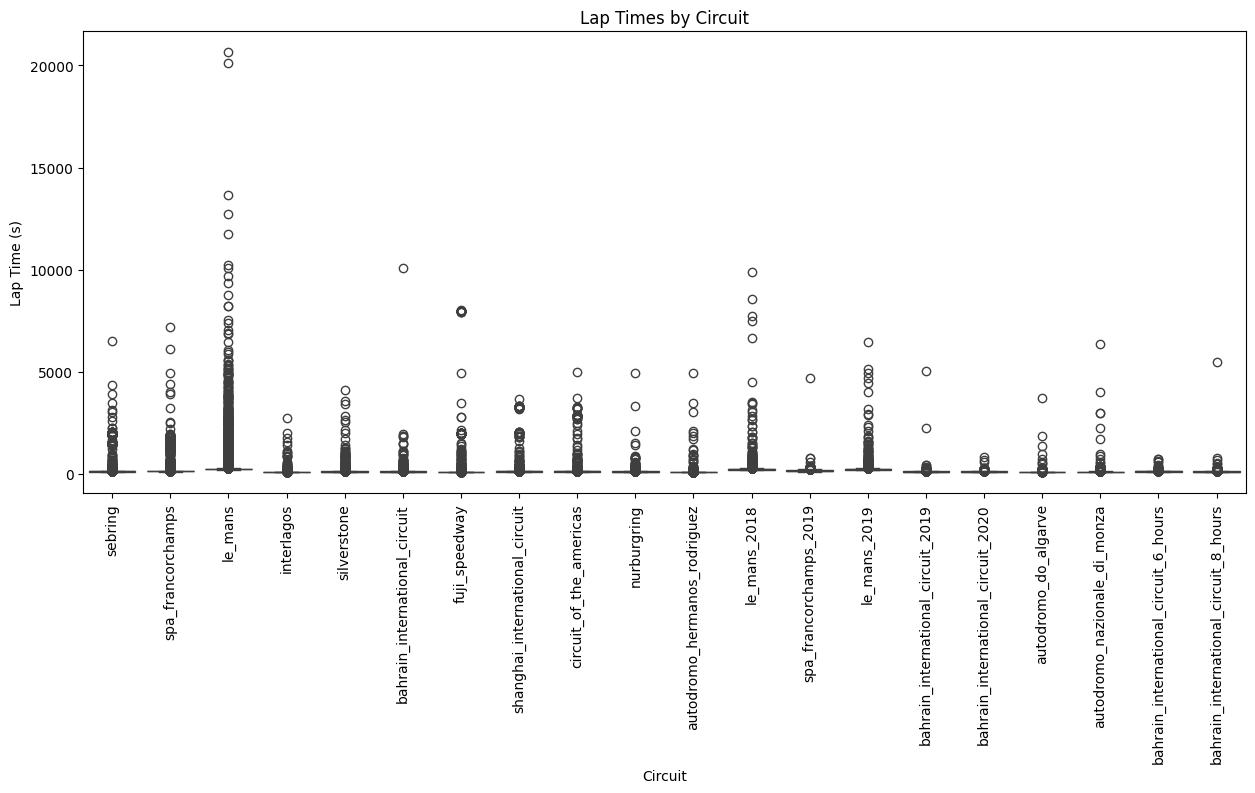

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['circuit'], y=joined_df['lap_time_s'])
plt.xlabel("Circuit")
plt.ylabel("Lap Time (s)")
plt.title("Lap Times by Circuit")
plt.xticks(rotation=90)
plt.show()


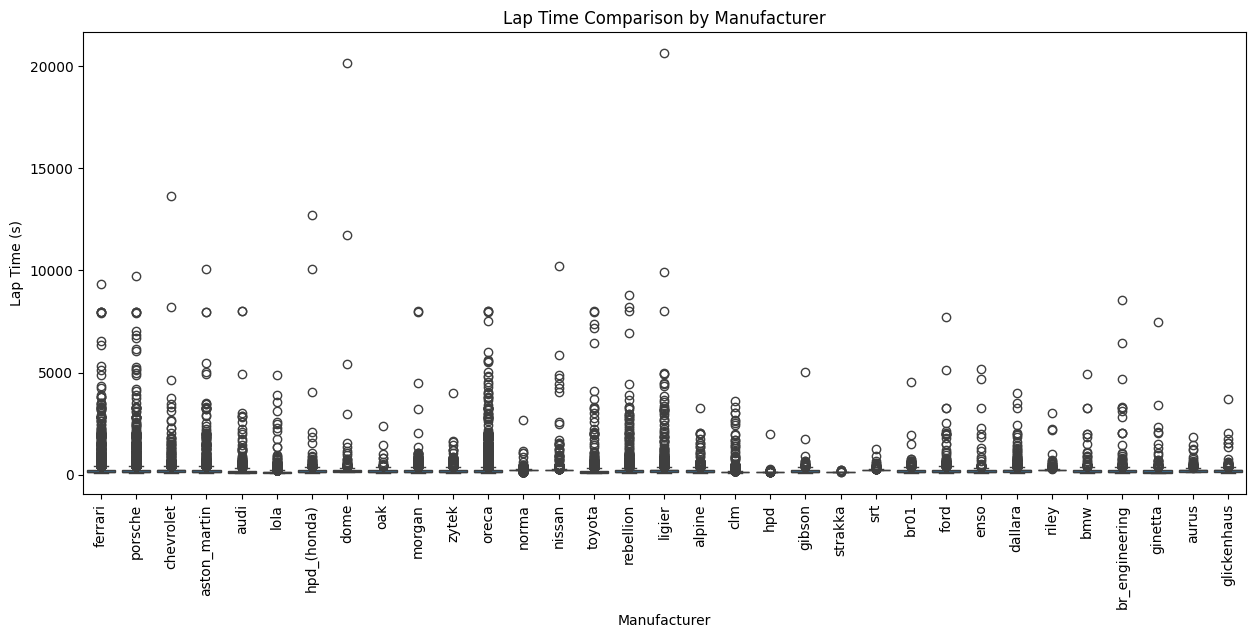

In [52]:
plt.figure(figsize=(15,6))
sns.boxplot(x='manufacturer', y='lap_time_s', data=df)
plt.xlabel("Manufacturer")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Comparison by Manufacturer")
plt.xticks(rotation=90)
plt.show()


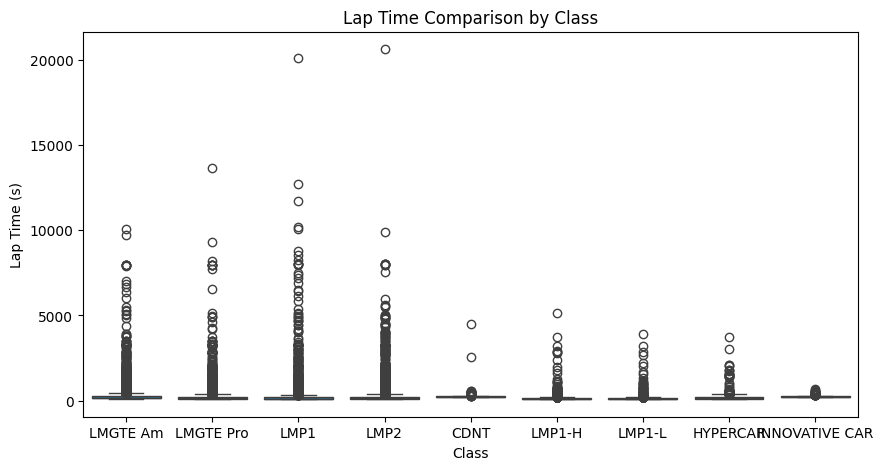

In [53]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class', y='lap_time_s', data=df)
plt.xlabel("Class")
plt.ylabel("Lap Time (s)")
plt.title("Lap Time Comparison by Class")
plt.show()


## Model Creation

In [54]:
x=joined_df.drop('lap_time_s',axis=1)
y=joined_df['lap_time_s']

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [56]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

In [57]:
print("Linear Regression")
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("RMSE :",root_mean_squared_error(y_test,y_pred))
print("R2_Score :",r2_score(y_test,y_pred))

Linear Regression
MAPE : 0.00695684381797738
RMSE : 16.373948190005713
R2_Score : 0.9878286421291794


In [58]:

# from sklearn.svm import SVR
# model = SVR(kernel='rbf')
# model.fit(x_train,y_train)
# y_pred=model.predict(x_test)
# print("SVM\n")
# print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
# print("RMSE :",root_mean_squared_error(y_test,y_pred))
# print("R2_Score :",r2_score(y_test,y_pred))

# WARNING : Did not complete after 5 min

In [59]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("KNN\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("RMSE :",root_mean_squared_error(y_test,y_pred))
print("R2_Score :",r2_score(y_test,y_pred))

KNN

MAPE : 0.009476760297854275
RMSE : 22.068442427706675
R2_Score : 0.9778906704807108


In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Decision Tree\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("RMSE :",root_mean_squared_error(y_test,y_pred))
print("R2_Score :",r2_score(y_test,y_pred))

Decision Tree

MAPE : 0.0008326283190034732
RMSE : 9.838307769358126
R2_Score : 0.9956058688295685


In [61]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Random Forest\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("RMSE :",root_mean_squared_error(y_test,y_pred))
print("R2_Score :",r2_score(y_test,y_pred))

Random Forest

MAPE : 0.0005841596525795542
RMSE : 16.350857692525665
R2_Score : 0.987862945956473


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Gradient Boosting\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("RMSE :",root_mean_squared_error(y_test,y_pred))
print("R2_Score :",r2_score(y_test,y_pred))

Gradient Boosting

MAPE : 0.016759987613730463
RMSE : 12.840855896647232
R2_Score : 0.9925145114089311


In [64]:
import xgboost as xgb
model = xgb.XGBRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("X G Boost\n")
print("MAPE :",mean_absolute_percentage_error(y_test,y_pred))
print("RMSE :",root_mean_squared_error(y_test,y_pred))
print("R2_Score :",r2_score(y_test,y_pred))

X G Boost

MAPE : 0.007091805423448882
RMSE : 42.47749273667703
R2_Score : 0.9180875422619814
